In [104]:
import sys
import os

import librosa  # python package for music and audio analysis
import librosa.display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd

import noisereduce as no
import matplotlib.image as mpimg

import cv2

from pprint import pprint 

In [105]:
# References:
# https://medium.com/@hasithsura/audio-classification-d37a82d6715
# https://github.com/m-kortas/Sound-based-bird-species-detection/blob/master/MK_prepareData.ipynb
def get_melspectrogram_db(file_path):
    n_fft = 2048
    hop_length = 512   
    n_mels = 128
    fmin = 1400 

    signal, sr = librosa.load(file_path)
    signal = no.reduce_noise(audio_clip=signal, noise_clip=signal, verbose=False)

    spec = librosa.feature.melspectrogram(
        signal, 
        sr=sr, 
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels,
        fmin=fmin
    )
    
    return librosa.power_to_db(spec, ref=np.max)

In [106]:
# References:
# https://stackoverflow.com/questions/56719138/how-can-i-save-a-librosa-spectrogram-plot-as-a-specific-sized-image/57204349#57204349
# https://medium.com/@hasithsura/audio-classification-d37a82d6715
def spec_to_image(spec, eps=1e-6):
    mean = spec.mean()
    std = spec.std()
    spec_norm = (spec - mean) / (std + eps)
    spec_min, spec_max = spec_norm.min(), spec_norm.max()
    spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
    spec_scaled = spec_scaled.astype(np.uint8)
    spec_scaled = np.flip(spec_scaled, axis=0)

    return spec_scaled

In [107]:
first_file = './data/train_audio/aldfly/XC134874.mp3'

In [108]:
img_size = (4096, 1024)

In [109]:
img = spec_to_image(get_melspectrogram_db(first_file))

In [110]:
img = cv2.resize(img, img_size)

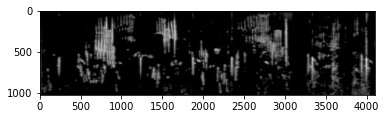

In [111]:
plt.imshow(img, cmap='gray')

In [112]:
mpimg.imsave("example.png", img, cmap='gray')

In [117]:
working_dir = "./data/train_audio/"
birds = []
flist = {} 

for root, dirs, files in os.walk(working_dir):
    if root == working_dir:
        birds = dirs[:30]

for i, bird in enumerate(birds):
    blist = [] 
    
    for root, dirs, files in os.walk(working_dir + bird):
        for file in files:
            if file.endswith(".mp3"):
                blist.append(os.path.join(root, file))

    flist[bird] = blist

In [118]:
storage_dir = "./data/train_img_test/"
existing_birds = []
existing_flist = {}

for root, dirs, files in os.walk(storage_dir):
    if root == storage_dir:
        existing_birds = dirs

for i, bird in enumerate(existing_birds):
    blist = [] 
    
    for root, dirs, files in os.walk(storage_dir + bird):
        for file in files:
            if file.endswith(".png"):
                blist.append(file)

    existing_flist[bird] = blist

In [121]:
import warnings
warnings.filterwarnings('ignore')

birds_handled = 0

for bird, files in flist.items():
    bird_dir = storage_dir + bird
    
    if not os.path.exists(bird_dir):
        os.mkdir(bird_dir)
    
    birds_handled += 1
    print(birds_handled)
    
    for file in files:
        if file.endswith(".mp3"):
            name = file.split('/')[-1].split('.')[0] + '.png'
            
            if bird in existing_birds and name in existing_flist[bird]:
                continue

            img = spec_to_image(get_melspectrogram_db(file))
            img = cv2.resize(img, img_size)
            mpimg.imsave(storage_dir + bird + "/" + name, img, cmap='gray')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
